## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(merge_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_timeline = merge_df[merge_df.duplicated(["Mouse ID","Timepoint"])]
duplicated_mouse_timeline["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_timeline

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df.drop_duplicates(subset=["Mouse ID","Timepoint"], keep="first")

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimens = list(clean_df["Drug Regimen"].unique())
mean_byregimen = list()
median_byregimen = list()
var_byregimen = list()
stddev_byregimen = list()
sem_byregimen = list()

for regimen in regimens:
    mean_byregimen.append(clean_df.loc[clean_df["Drug Regimen"]==regimen, "Tumor Volume (mm3)"].mean())
    median_byregimen.append(clean_df.loc[clean_df["Drug Regimen"]==regimen, "Tumor Volume (mm3)"].median())
    var_byregimen.append(clean_df.loc[clean_df["Drug Regimen"]==regimen, "Tumor Volume (mm3)"].var())
    stddev_byregimen.append(clean_df.loc[clean_df["Drug Regimen"]==regimen, "Tumor Volume (mm3)"].std())
    sem_byregimen.append(clean_df.loc[clean_df["Drug Regimen"]==regimen, "Tumor Volume (mm3)"].sem())

summary_byregimen = pd.DataFrame({
                    "Drug Regimen": regimens,
                    "Mean Tumor Volume (mm3)": mean_byregimen,
                    "Median Tumor Volume (mm3)": median_byregimen,
                    "Variance Tumor Volume (mm3)": var_byregimen,
                    "Standard Deviation Tumor Volume (mm3)": stddev_byregimen,
                    "SEM Tumor Volume (mm3)": sem_byregimen
                    })

summary_byregimen = summary_byregimen.set_index("Drug Regimen")
summary_byregimen

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
cut_df = clean_df[["Drug Regimen", "Tumor Volume (mm3)"]]
cut_byregimen = cut_df.groupby(["Drug Regimen"])
summary2_byregimen = cut_byregimen.mean()
summary2_byregimen = summary2_byregimen.rename(columns={"Total Volume (mm3)": "Mean Tumor Volume (mm3)"})
summary2_byregimen["Median Tumor Volume (mm3)"] = cut_byregimen.median()
summary2_byregimen["Variance Tumor Volume (mm3)"] = cut_byregimen.var()
summary2_byregimen["Standard Deviation Tumor Volume (mm3)"] = cut_byregimen.std()
summary2_byregimen["SEM Tumor Volume (mm3)"] = cut_byregimen.sem()

summary2_byregimen

,Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),SEM Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

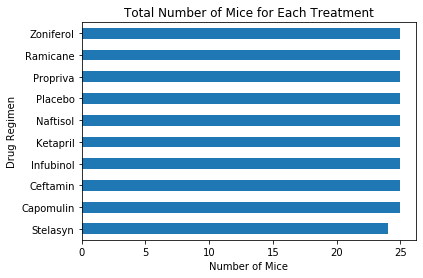

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
cut_df = clean_df[["Drug Regimen", "Mouse ID"]]
cut_df = cut_df.drop_duplicates(subset=["Drug Regimen", "Mouse ID"], keep="first")
mice_byregimen = cut_df.groupby(["Drug Regimen"]).count()
mice_byregimen = mice_byregimen.rename(columns={"Mouse ID": "Number of Mice"})
mice_byregimen = mice_byregimen.sort_values("Number of Mice")
mice_chart = mice_byregimen.plot(kind='barh',
                                 legend=False,
                                 title="Total Number of Mice for Each Treatment")
mice_chart.set_xlabel("Number of Mice")
plt.show()
plt.tight_layout()

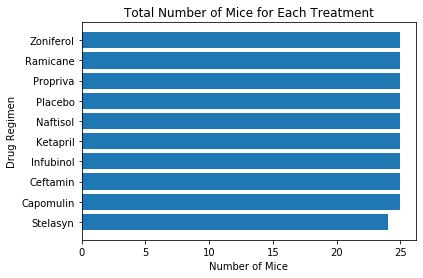

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
value = mice_byregimen["Number of Mice"]
labels = list(mice_byregimen.index)

plt.barh(labels, value, alpha=1, align="center")
plt.xlabel("Number of Mice")
plt.ylabel("Drug Regimen")
plt.title("Total Number of Mice for Each Treatment")
plt.show()
plt.tight_layout()

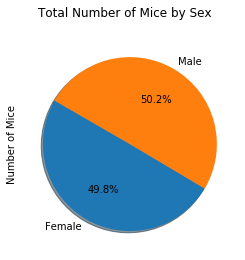

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
cut_df = clean_df[["Sex", "Mouse ID"]]
cut_df = cut_df.drop_duplicates(subset=["Sex", "Mouse ID"], keep="first")
mice_bysex = cut_df.groupby(["Sex"]).count()
mice_bysex = mice_bysex.rename(columns={"Mouse ID": "Number of Mice"})
mice_chart = mice_bysex.plot(kind='pie', 
                             subplots=True,
                             legend=False,
                             autopct='%1.1f%%',
                             startangle = 150,
                             shadow=True,
                             title="Total Number of Mice by Sex")
plt.show()
plt.tight_layout()

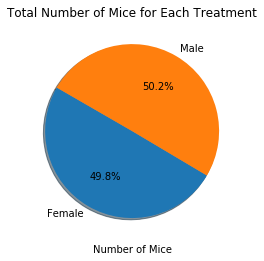

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
value = mice_bysex["Number of Mice"]
labels = list(mice_bysex.index)

plt.pie(value, 
        labels=labels, 
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=150)
plt.xlabel("Number of Mice")
plt.title("Total Number of Mice for Each Treatment")
plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
timepoint_df = clean_df.groupby(["Mouse ID"])
timepoint_df = timepoint_df["Timepoint"].max()
timepoint_df = timepoint_df.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergetime_df = timepoint_df.merge(clean_df[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]], on=["Mouse ID","Timepoint"], how="left")
fourtreatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
mergetime_df = mergetime_df[mergetime_df["Drug Regimen"].isin(fourtreatments)]
mergetime_df = mergetime_df[["Drug Regimen","Mouse ID","Tumor Volume (mm3)"]]
mergetime_df = mergetime_df.sort_values(by="Drug Regimen")
mergetime_df.head()

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
116,Capomulin,l897,38.846876
86,Capomulin,j119,38.125164
88,Capomulin,j246,38.753265
193,Capomulin,u364,31.023923
66,Capomulin,g316,40.159220


In [15]:
# My alternative method - sort by values based on timepoint, mouse id and drug regiment
# Then drop duplicates to keep last timepoint by drug regiment and mouse id
# Only keep rows with the 4 treatments stated
clean_df = clean_df.sort_values(by=["Drug Regimen","Mouse ID","Timepoint"], ascending=True)
finalvol_df = clean_df.drop_duplicates(subset=["Drug Regimen","Mouse ID"], keep="last")
#fourtreatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
#finalvol_df = finalvol_df[finalvol_df["Drug Regimen"].isin(fourtreatments)]
#finalvol_df.shape
finalvol_df.groupby("Drug Regimen").mean()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,
Capomulin,14.040,20.120,41.000000,36.667568,1.280000
Ceftamin,12.800,27.400,30.600000,57.753977,1.720000
Infubinol,16.400,27.320,30.600000,58.178246,1.600000
Ketapril,14.720,28.080,32.600000,62.806191,1.920000
Naftisol,12.240,27.240,32.200000,61.205757,2.000000
Placebo,10.680,28.040,31.200000,60.508414,2.080000
Propriva,9.880,27.240,26.200000,56.736964,1.560000
Ramicane,10.840,20.000,40.600000,36.191390,1.200000
Stelasyn,13.125,27.875,32.708333,61.001707,1.458333


In [16]:
listdata_df = mergetime_df[["Drug Regimen","Tumor Volume (mm3)"]]
#listdata_df = listdata_df.set_index("Drug Regimen")

# Put treatments into a list for for loop (and later for plot labels)
fourtreatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = list()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes    
tumor_vol_data = [listdata_df["Tumor Volume (mm3)"].loc[listdata_df["Drug Regimen"] == fourtreatments[x]] for x in range(len(fourtreatments))]
    
    # add subset 
outliers = 0    

for x in range(len(fourtreatments)):
    quartiles = tumor_vol_data[x].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    if len(tumor_vol_data[x][tumor_vol_data[x] > upper_bound])+len(tumor_vol_data[x][tumor_vol_data[x] < lower_bound]) == 0:
        print(f"There are no potential outliers in {fourtreatments[x]} Tumor Volume")
    elif len(tumor_vol_data[x][tumor_vol_data[x] > upper_bound])+len(tumor_vol_data[x][tumor_vol_data[x] < lower_bound]) == 1:
        print(f"There is {len(tumor_vol_data[x][tumor_vol_data[x] > upper_bound])+len(tumor_vol_data[x][tumor_vol_data[x] < lower_bound])} potential outlier in {fourtreatments[x]} Tumor Volume")
    else:
        print(f"There are {len(tumor_vol_data[x][tumor_vol_data[x] > upper_bound])+len(tumor_vol_data[x][tumor_vol_data[x] < lower_bound])} potential outliers in {fourtreatments[x]} Tumor Volume")

There are no potential outliers in Capomulin Tumor Volume
There are no potential outliers in Ramicane Tumor Volume
There is 1 potential outlier in Infubinol Tumor Volume
There are no potential outliers in Ceftamin Tumor Volume


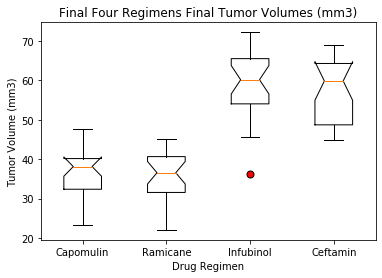

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, box = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='r', markersize=7)
box.set_xlabel("Drug Regimen")
box.set_ylabel("Tumor Volume (mm3)")
box.set_title("Final Four Regimens Final Tumor Volumes (mm3)")
box = plt.boxplot([listdata_df["Tumor Volume (mm3)"].loc[listdata_df["Drug Regimen"] == fourtreatments[x]] for x in range(len(fourtreatments))],
           labels=fourtreatments,
           notch=True,
           flierprops=flierprops)
plt.show()

## Line and Scatter Plots

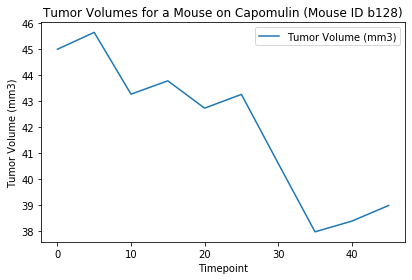

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
linedata = clean_df.loc[clean_df["Mouse ID"] == "b128"]
line = linedata.plot(x ="Timepoint", y="Tumor Volume (mm3)", kind="line", legend="none")
line.set_ylabel("Tumor Volume (mm3)")
line.set_title("Tumor Volumes for a Mouse on Capomulin (Mouse ID b128)")
plt.tight_layout()
plt.show()

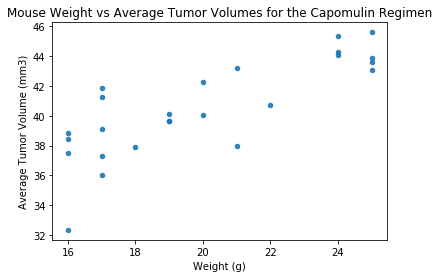

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulinreg = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
scatterdata = capomulinreg.groupby(["Mouse ID"]).mean()
scatter = scatterdata.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind="scatter", alpha=0.9)
scatter.set_ylabel("Average Tumor Volume (mm3)")
scatter.set_title("Mouse Weight vs Average Tumor Volumes for the Capomulin Regimen")
plt.show()

## Correlation and Regression

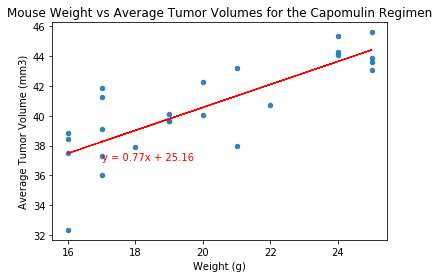

Correlation coefficient: 0.81


In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatterdata["Weight (g)"], scatterdata["Tumor Volume (mm3)"])
equation = slope * scatterdata["Weight (g)"] + intercept
printequation = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

capomulinreg = clean_df[clean_df["Drug Regimen"] == "Capomulin"]
scatterdata = capomulinreg.groupby(["Mouse ID"]).mean()
scatter = scatterdata.plot(x="Weight (g)", y="Tumor Volume (mm3)", kind="scatter", alpha=0.9)
scatter.set_ylabel("Average Tumor Volume (mm3)")
scatter.set_title("Mouse Weight vs Average Tumor Volumes for the Capomulin Regimen")
plt.plot(scatterdata["Weight (g)"],equation,"r-.", linewidth=1)
plt.annotate(printequation, (17,37), fontsize=10, color="r")
plt.show()

print (f"Correlation coefficient: {round(rvalue,2)}")

# Observations & Insights

1. Capomulin and Ramicane are the only drugs that have observable reduction in the mice Tumor Volume after 45 days.

2. There seems to be a strong positive correlation at 0.84 between weight and average tumor volume in mice for the Capomulin and Ramicane regimen.

3. Ramicane seems may be a better choice compared to Capomulin due to the following:
    a) there is less difference between mean and median
    b) there is less variation in the data (more predictable outcome) as observed by the lower standard deviation and variance
    c) the average Metastatic Sites is smaller (1.20 vs 1.28 for Capomulin)